In [4]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import os
from utilitaire import load_data


In [5]:
def initialisation(dimension):
    #Cette fonction iniatilise les variables w et b avec des valeurs aleatoires
    C = len(dimension)
    params = {}

    for c in range(1, C):
        params['w' + str(c)] = np.random.randn(dimension[c], dimension[c-1])
        params['b' + str(c)] = np.random.randn(dimension[c],1)

    return params

In [6]:
def forward_propagation(X, params):

    A = {'a0': X}
    C = len(params)//2 

    for c in range(1, C+1):
        Z = params['w'+str(c)].dot(A['a'+str(c-1)]) +params['b'+str(c)]
        A['a'+str(c)] = 1/(1 + np.exp(-Z))

    return A

In [7]:
def cost_function(A, y):
    epsilon = 1e-15
    return 1/len(y)*np.sum(-y*np.log(A + epsilon) - (1 - y)*np.log(1 - A + epsilon))

In [8]:
def back_propagation(A, X, y, params):
    m  = y.shape[1]
    gradient = {}
    Cf = len(params)//2
    dz = A['a'+str(Cf)] - y

    for c in reversed(range(1, Cf+1)):
        gradient['dw'+str(c)] = 1/m * dz.dot(A['a'+str(c-1)].T)
        gradient['db'+str(c)] = 1/m * np.sum(dz, axis=1, keepdims=True)
        if c > 1:
            dz = np.dot(params['w'+str(c)].T, dz) * A['a'+str(c-1)] * (1 - A['a'+str(c-1)])

    return gradient

In [9]:
def udpate(gradient, params, rate_learning):
    C = len(params)//2
    for c in range(1, C+1):
        params['w'+str(c)] = params['w'+str(c)] - rate_learning * gradient['dw'+str(c)]
        params['b'+str(c)] = params['b'+str(c)] - rate_learning * gradient['db'+str(c)]

    return params


In [10]:
def prediction(X, params):
    A = forward_propagation(X, params)
    Cf = len(params)//2
    return A['a'+str(Cf)] >= 0.5

In [22]:
def neural_network(X, Y, hidden_layers ,nbr_iteration = 1000, rate_learning = 0.01):
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(Y.shape[0])
    params = initialisation(dimensions)

    Lg_train = []
    acc_train = []
    #Lg_test = []
    #acc_test = []
    
    Rate = 0
    for i in tqdm(range(nbr_iteration)):
        A = forward_propagation(X, params)   
        gradient = back_propagation(A, X, Y, params)  
        params = udpate(gradient, params, rate_learning)   
        if i % 10 ==0:
            #for train
            Cf = len(params)//2
            Lg_train.append(cost_function(A['a'+str(Cf)], Y))
            y_pred = prediction(X, params)
            Rate = accuracy_score(Y.flatten(), y_pred.flatten())
            acc_train.append(Rate)


            """A_t = forward_propagation(x, params)
            #for train
            Lg_test.append(cost_function(A_t['A2'], y))
            y_pred = prediction(x, params)
            ym = y.flatten()
            rate = accuracy_score(ym, y_pred.flatten()[:ym.shape[0]])
            acc_test.append(rate)"""
        


        
    print(Rate)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(Lg_train, label = 'Train Loss')
    #plt.plot(Lg_test, label = 'Test Loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(acc_train, label = 'Train Acc')
    #plt.plot(acc_test, label = 'Test Acc')
    plt.legend()
    plt.show()
    return params

In [12]:
def show_image(x):
    plt.figure(figsize=(18,8))
    for i in range(1, 15):
        plt.subplot(4, 5, i)
        plt.imshow(x[i])
        plt.tight_layout()
    plt.show()

In [13]:
def save_model(params):
    
    with open('./datasets/deep_model.data', 'wb') as file:
        myPickler  = pickle.Pickler(params)
        myPickler.dump(params)
        file.close()

In [14]:
def redimension(X_train, Y_train, X_test, Y_test):
    Y_train = Y_train.T
    Y_test = Y_test.T
    X_train =  X_train.T
    X_test = X_test.T

    X_train = X_train.reshape(-1, X_train.shape[-1])/X_train.max()
    X_test = X_test.reshape(-1, X_test.shape[-1])/X_test.max()

    m_train = 300
    m_test = 80

    X_train = X_train[:, :m_train]
    X_test = X_test[:, :m_test]
    Y_train = Y_train[:, :m_train]
    Y_test = Y_test[:, :m_test]

    return  X_train, Y_train, X_test, Y_test

In [18]:
X, y = make_circles(n_samples=100, random_state=0,  noise = 0.01)

y = y.reshape(y.shape[0], 1)

X = X.T
Y = y.T

100%|██████████| 1000/1000 [00:00<00:00, 1540.70it/s]


0.5


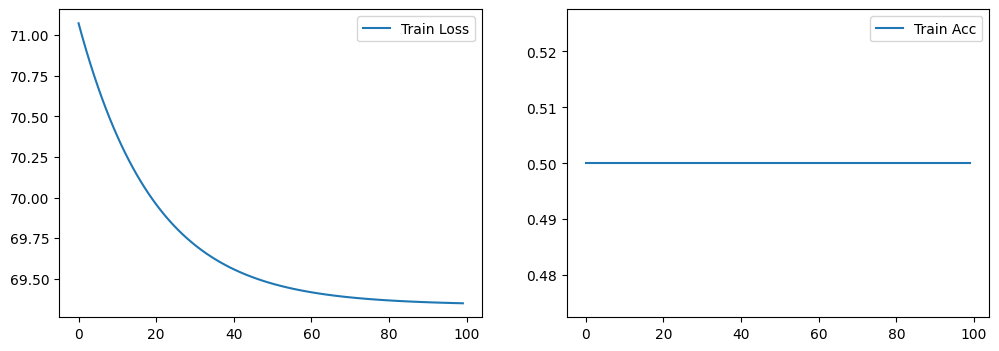

In [28]:
params = neural_network(X, Y, hidden_layers = (32, 32,  1))

In [ ]:

with open('./datasets/deep_model.data', 'rb') as file:
    params = pickle.Unpickler(file).load()

params

{'w1': array([[10.54507002,  7.83391601],
        [ 0.61784887,  0.50908833]]),
 'b1': array([[-6.12106213],
        [-0.24653925]]),
 'w2': array([[-1.68604791, -1.27471972],
        [-2.30045408, -0.4079439 ],
        [-1.59678494, -0.94935811],
        [-2.00902121, -0.55720409],
        [-1.55213959,  0.75415196],
        [-2.7774138 ,  0.03141977],
        [-2.35614874,  1.24265256],
        [-1.97247669,  0.3436968 ],
        [-1.96787511,  1.09685372],
        [-2.19414158,  0.06561252],
        [-1.56645379,  2.38877495],
        [-1.59248276, -0.38493852],
        [-2.34205   ,  3.13953249],
        [-2.31194626, -0.81231017],
        [-2.33639854, -0.582501  ],
        [-2.02013671, -0.07353067],
        [-2.83553923,  1.5191749 ],
        [-2.61740431, -0.05112822],
        [-2.54485761, -0.53766384],
        [-1.54642488,  0.30321444],
        [-1.43674125, -0.87415238],
        [-1.93169977,  0.13143977],
        [-2.16429456,  0.27661247],
        [-2.00122606, -0.8488796